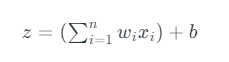 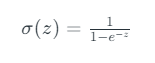

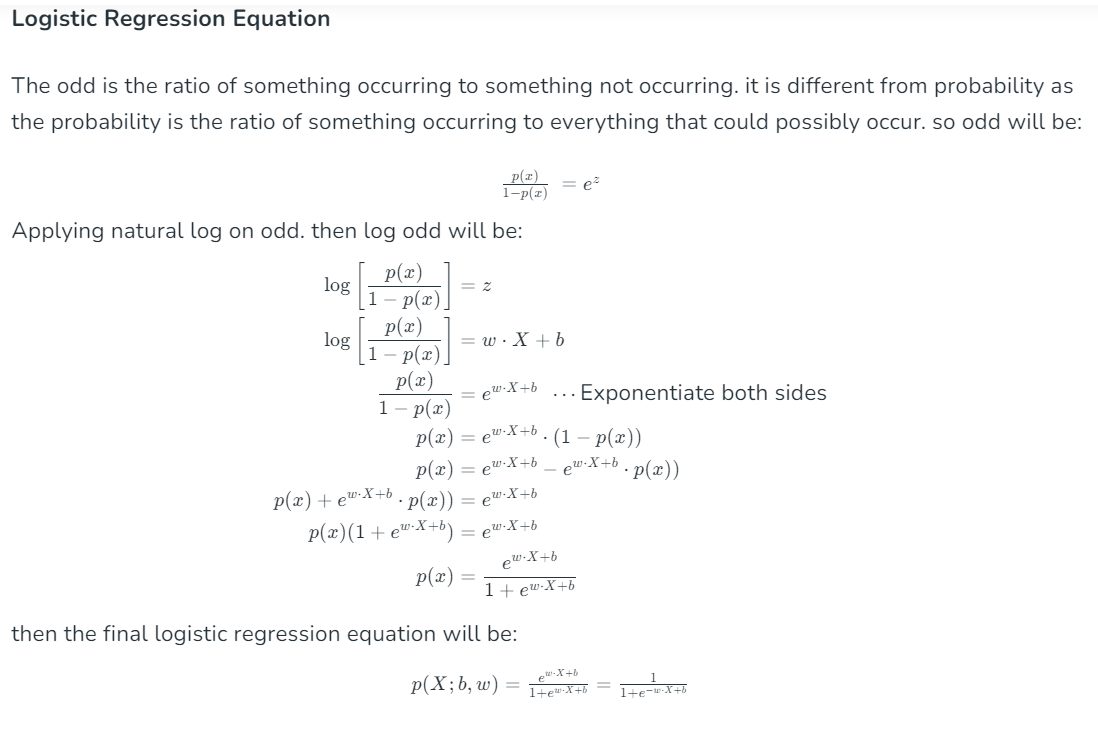

Log-odds: The log-odds, also known as the logit function, is the natural logarithm of the odds. In logistic regression, the log odds of the dependent variable are modeled as a linear combination of the independent variables and the intercept.

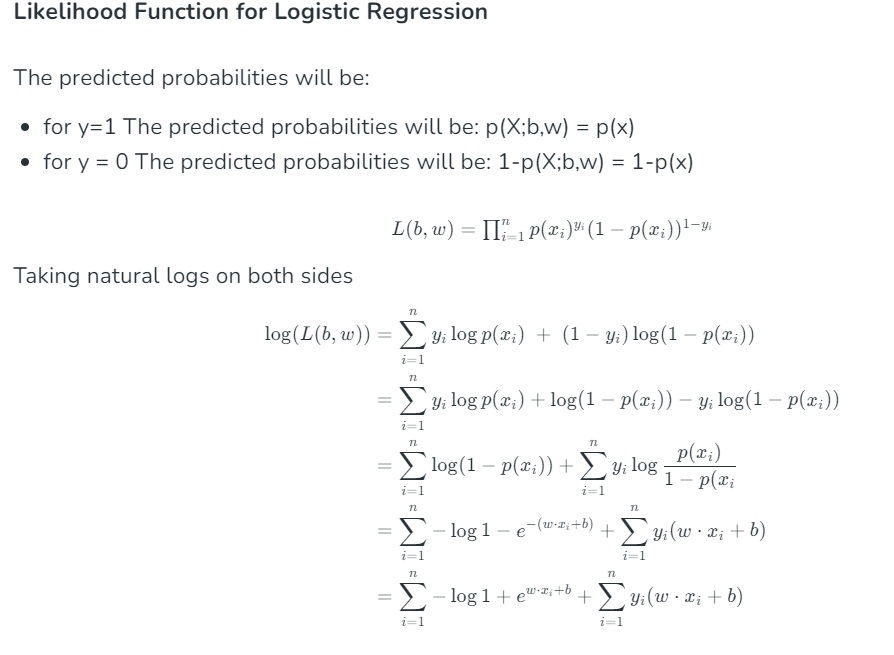

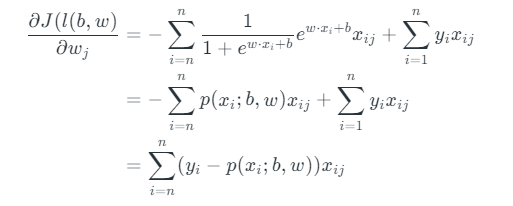

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

In [198]:
from sklearn.preprocessing import StandardScaler

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify = y,test_size=0.25)

In [201]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [202]:
y_train

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,

In [203]:
import random
def initialise(X):
    dim = X.shape[1]
    b = random.random()
    w = np.random.rand(dim)
    return w,b

In [204]:
w,b = initialise(x_train)
print(w,b)

[0.52802641 0.51284288 0.87739236 0.53397372 0.43490609 0.14952985
 0.26049383 0.40921431 0.59237967 0.37166845 0.79662237 0.70330875
 0.0134334  0.33779274 0.39898251 0.80761018 0.64926338 0.76092202
 0.49621216 0.50060015 0.82667484 0.38073819 0.49945629 0.60945316
 0.14568182 0.57842774 0.03973066 0.87772915 0.28561915 0.17444225] 0.6058460998541813


In [205]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [206]:
def cost(X,y_true,w,b):
    y_pred = sigmoid(np.dot(X,w)+b)
    epsilon = 1e-35
    return (-1/len(y_true))*np.sum(y_true*np.log(y_pred+epsilon)+(1-y_true)*np.log(1-y_pred+epsilon))

In [207]:
cost(x_train,y_train,w,b)

7.091893376129829

In [208]:
def update_param(X,y,w,b,lr):
    m = X.shape[0]
    z = np.dot(X,w) + b
    y_pred = sigmoid(z)
    dw = np.dot(y_pred-y,X)/m
    db = np.sum(y_pred-y)/m
    w = w - lr*dw
    b = b - lr*db
    return w,b

In [209]:
w,b = update_param(x_train,y_train,w,b,0.01)
cost(x_train,y_train,w,b)

7.012013839435974

In [210]:
def logistic_reg(X,y,lr,epochs):
    w,b = initialise(X)
    cost_list = []
    it_list = []
    for i in range(1,epochs):
        w,b = update_param(X,y,w,b,lr)
        cost_list.append(cost(X,y,w,b))
        it_list.append(i)
    df = pd.DataFrame({"Cost":cost_list,"Iterations":it_list})
    return w,b,df

In [251]:
w_final,b_final,df_final = logistic_reg(x_train,y_train,0.1,250)

Text(0.5, 1.0, 'Logistic Regression Cost vs epochs')

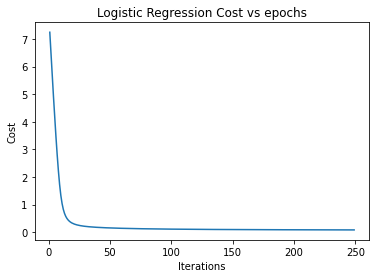

In [252]:
plt.plot(df_final['Iterations'],df_final['Cost'])
plt.xlabel('Iterations')
plt.ylabel("Cost")
plt.title("Logistic Regression Cost vs epochs")

In [253]:
def predict(x,w,b):
    return sigmoid(np.dot(x,w)+b)>0.5

In [254]:
y_pred = predict(x_test,w_final,b_final)

In [255]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [256]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98        53
        True       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [257]:
print(confusion_matrix(y_pred,y_test))

[[52  1]
 [ 1 89]]


In [258]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [259]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        55
           1       0.98      1.00      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143



In [260]:
print(confusion_matrix(pred,y_test))

[[53  2]
 [ 0 88]]


Text(0.5, 1.0, 'Logistic Regression Cost vs epochs')

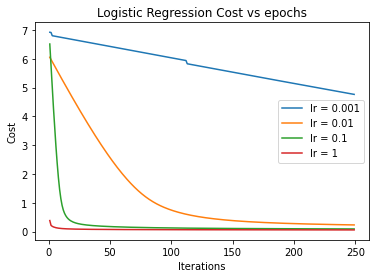

In [261]:
w_final1,b_final1,df_final1 = logistic_reg(x_train,y_train,0.001,250)
w_final2,b_final2,df_final2 = logistic_reg(x_train,y_train,0.01,250)
w_final3,b_final3,df_final3 = logistic_reg(x_train,y_train,0.1,250)
w_final4,b_final4,df_final4 = logistic_reg(x_train,y_train,1,250)
plt.plot(df_final1['Iterations'],df_final1['Cost'],label = 'lr = 0.001')
plt.plot(df_final2['Iterations'],df_final2['Cost'],label = 'lr = 0.01')
plt.plot(df_final3['Iterations'],df_final3['Cost'],label = 'lr = 0.1')
plt.plot(df_final4['Iterations'],df_final4['Cost'],label = 'lr = 1')
plt.xlabel('Iterations')
plt.ylabel("Cost")
plt.legend()
plt.title("Logistic Regression Cost vs epochs")


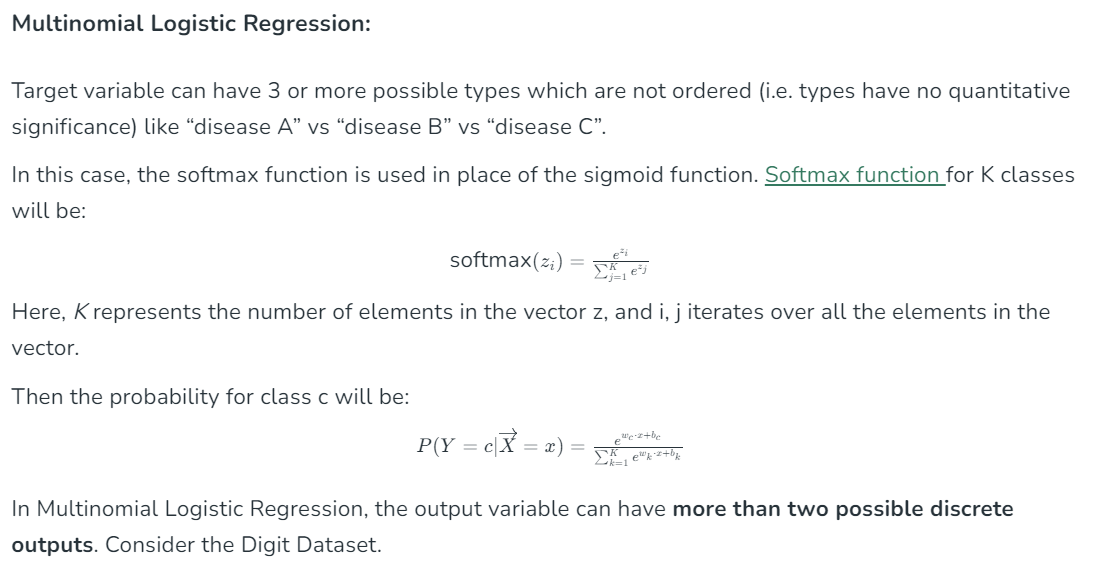

In [263]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics

digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.4,
                                       random_state=1)

reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Logistic Regression model accuracy(in %):",
      metrics.accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 96.52294853963839


C:\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


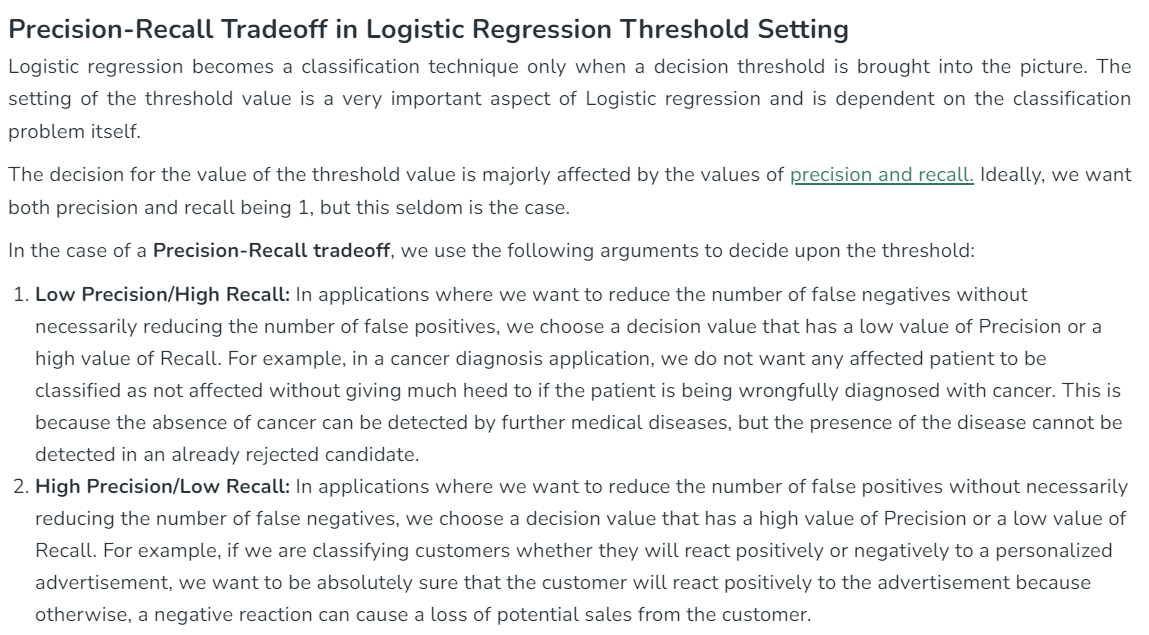